# EDA ON SUICIDE RATES FROM 1990 - 2022

In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import csv
import os
import sys

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

sb.set_style("darkgrid")

In [40]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Suicide Rates & Socioeconomic Factors (1990 - 22)\suicide_rates_1990-2022.csv")
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                           111320 non-nul

In [42]:
df.isnull().sum()

RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4289
DeathRatePer100K                10664
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64

In [43]:
df['GDPPerCapita'] = df['GDPPerCapita'].fillna(df['GDPPerCapita'].median())

In [44]:
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['SuicideCount'] = df['SuicideCount'].fillna(df['SuicideCount'].mean())
df['GNIPerCapita'] = df['GNIPerCapita'].fillna(df['GNIPerCapita'].median())
df['GrossNationalIncome'] = df['GrossNationalIncome'].fillna(df['GrossNationalIncome'].median())
df['Population' ] = df['Population'].fillna(df['Population'].mean())
df['DeathRatePer100K'] = df['DeathRatePer100K'].interpolate(method='linear')
df['CauseSpecificDeathPercentage'] = df['CauseSpecificDeathPercentage'].interpolate(method='linear')
df['EmploymentPopulationRatio'] = df['EmploymentPopulationRatio'].ffill() #(method=df['EmploymentPopulationRatio'].ffill())

In [45]:
df = df.drop(columns = 'InflationRate', axis=1)

In [46]:
df.isnull().sum()

RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
AgeGroup                        0
Generation                      0
SuicideCount                    0
CauseSpecificDeathPercentage    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GrossNationalIncome             0
GNIPerCapita                    0
EmploymentPopulationRatio       0
dtype: int64

In [47]:


def get_categories(df):
    cat = []
    categories = df.select_dtypes(include=['float64', 'int64'])
    for i in categories:
        cat.append(i)
    print(cat)
    sb.heatmap(df[cat].corr(), annot=True, linewidths=0.5)
    plt.title('Pearsons Correlation of Columns')
    

['Year', 'SuicideCount', 'CauseSpecificDeathPercentage', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita', 'EmploymentPopulationRatio']


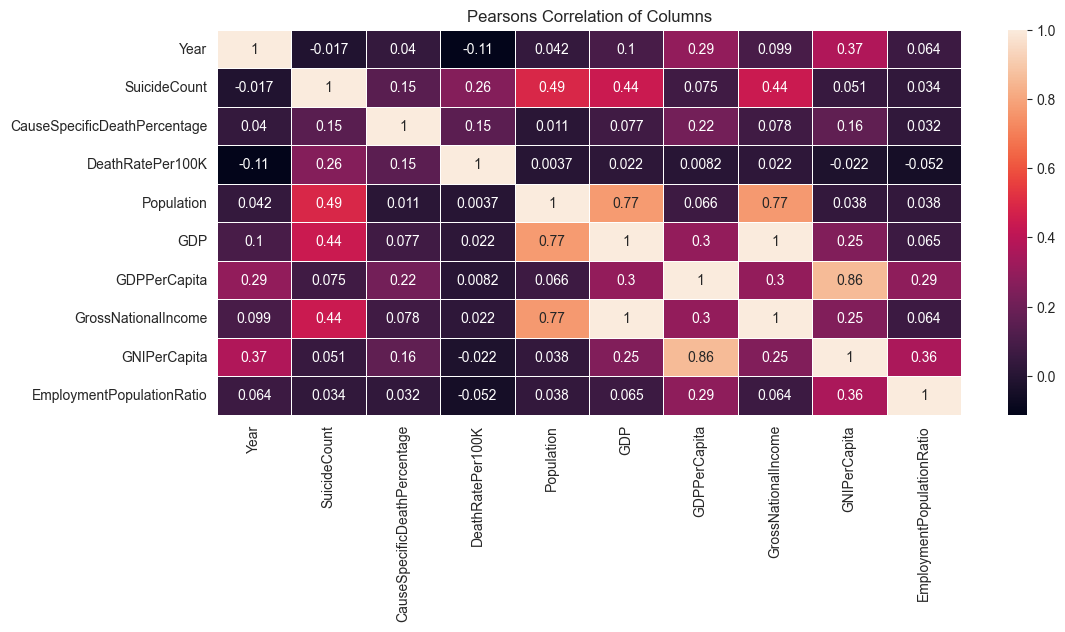

In [48]:
plt.figure(figsize=(12, 5))
get_categories(df)

Text(0.5, 1.0, 'Suicide Count Pearsons Correlation with relevant Column Series')

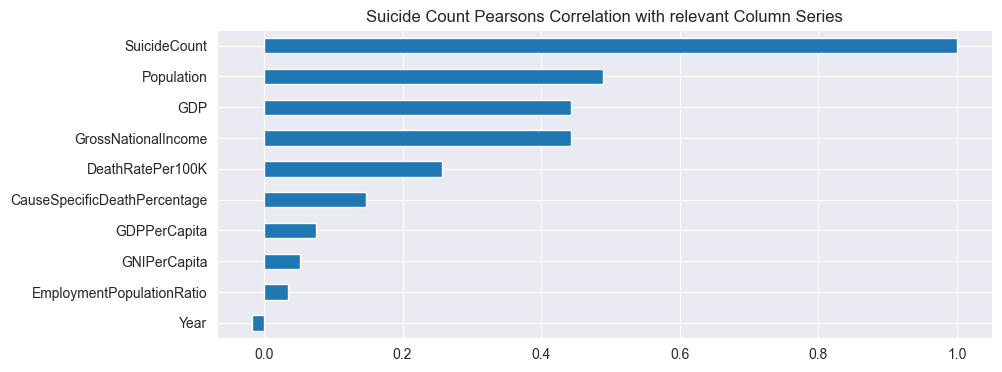

In [55]:
df.select_dtypes(include=['int64', 'float64']).corr()['SuicideCount'].sort_values().plot(kind='barh', figsize=(10, 4))
plt.title('Suicide Count Pearsons Correlation with relevant Column Series')

In [67]:
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315


In [68]:
def get_object(df):
    obj = []
    categories = df.select_dtypes(include=['object'])
    le = LabelEncoder()
    for i in categories:
        df[i] = le.fit_transform(df[i])

In [70]:
get_object(df)

In [71]:
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,EmploymentPopulationRatio
0,3,3,0,0,1992,1,0,1,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
1,3,3,0,0,1992,1,0,1,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
2,3,3,0,0,1992,1,0,1,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
3,3,3,0,0,1992,1,0,1,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
4,3,3,0,0,1992,1,1,3,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315


In [72]:
x = df.drop(columns=['SuicideCount'], axis=1)
y = df['SuicideCount']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [73]:
dtr = DecisionTreeRegressor()
lr = LinearRegression()

[18.  0.  5. ...  1. 34.  0.]


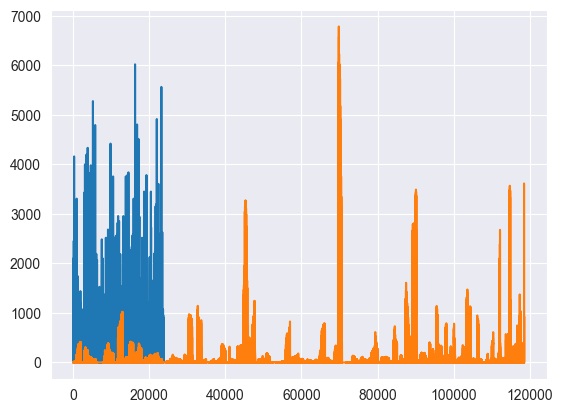

In [79]:
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)
plt.plot(y_pred)
plt.plot(y)
print(y_pred)